In [66]:
PROC_TRAIN_DATA_PATH = "../data/interim/1__analytics_preprocessed_df.pkl"
FIG_DIR = "../reports/figures/"

# Import packages

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

from scipy import stats

import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import MultiLabelBinarizer, Normalizer

In [68]:
# Change some pandas display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.width', 1000)
pd.set_option("styler.format.precision", 10)

# Data reading

In [69]:
df_train = pd.read_pickle(PROC_TRAIN_DATA_PATH)

In [100]:
# Obtain cat and num columns
cat_vars = df_train.select_dtypes('object').columns
num_vars = df_train.select_dtypes(np.number).columns

In [71]:
# Show a small batch of data
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,FenceQual,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Univariate analysis

## Numerical variables

In [72]:
# plot the kde of numerical features
def plot_kde(data:pd.DataFrame):
    """
    Plot the kde of numerical features
        
    Parameters
    ----------
    data : DataFrame
    """

    figure = plt.figure(figsize=(35, int(len(data.columns)*1.5)))
    figure.subplots_adjust(wspace=0.3, hspace=0.5)
    

    for i, col in enumerate(data.columns, start=1):
        ax = figure.add_subplot(len(data.columns)//3 + 1, 3, i)
        sns.distplot(data[col], fit=stats.norm, hist=False, kde=True, 
                     kde_kws={'linewidth': 3, 'shade': True, 'color': 'darkblue'}, 
                     label=col, ax=ax)       

        sns.despine()
        plt.legend()

# plot_kde(df_train[num_cols])


## Categorical variables

In [73]:
# plot countplot for categorical features
def plot_count_plot(data:pd.DataFrame):
    """
    Plot countplot for categorical features
    
    Parameters
    ----------
    data : DataFrame
    """
    figure = plt.figure(figsize=(35, int(len(data.columns)*1.5)))
    figure.subplots_adjust(wspace=0.3, hspace=0.8)

    for i, col in enumerate(data.columns, start=1):
        ax = figure.add_subplot(len(data.columns)//3 + 1, 3, i)
        sns.countplot(x=col, data=data, ax=ax)
        sns.despine()
        ax.tick_params(axis='x', rotation=90)
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        

# plot_count_plot(df_train[cat_cols])

# Bivariate analysis

## Cat - Cat relations
Discovering some patterns between categorical variables

In [74]:
# Show pattern between the following categorical variables
relation_cat_cols = ['OverallQual', 'OverallCond', 'Condition1', 'Neighborhood', 'Utilities', 'MSSubClass', 'SaleCondition']

# Encode these variables
enc_dfs_dict = {}       # key: feat_name, value: its encoded values
for col in relation_cat_cols:
    binarizer = MultiLabelBinarizer()
    
    enc_df = pd.DataFrame(binarizer.fit_transform(df_train[col].to_numpy().reshape(-1,1)), 
                                columns=binarizer.classes_,
                                index=df_train[col].index)

    enc_dfs_dict[col] = enc_df

encoded_df_train = pd.concat(enc_dfs_dict, axis=1)
encoded_df_train.head()

OverallQual                                                                                     OverallCond                                                                    Condition1                                          Neighborhood                                                                                                                                                                                        Utilities        MSSubClass                                               SaleCondition                                     
  Above Average Average Below Average Excellent Fair Good Poor Very Excellent Very Good Very Poor Above Average Average Below Average Excellent Fair Good Poor Very Good Very Poor     Artery Feedr Norm PosA PosN RRAe RRAn RRNe RRNn      Blmngtn Blueste BrDale BrkSide ClearCr CollgCr Crawfor Edwards Gilbert IDOTRR MeadowV Mitchel NAmes NPkVill NWAmes NoRidge NridgHt OldTown SWISU Sawyer SawyerW Somerst StoneBr Timber Veenker    AllPub NoSeWa         20 30 40 45 50 60 70 75 80 85 90 120 160 180 190       Abnorml AdjLand Alloca Family Normal Partial
0  0             0       0             0         0    1    0    0              0         0         0             1       0             0         0    0    0    0         0         0          0     1    0    0    0    0    0    0    0            0       0      0       0       1       0       0       0       0      0       0       0     0       0      0       0       0       0     0      0       0       0       0      0       1         0      0          0  0  0  0  1  0  0  0  0  0  0   0   0   0   0             0       0      0      1      0     
1  1             0       0             0         0    0    0    0              0         0         0             0       0             0         0    0    0    1         0         0          1     0    0    0    0    0    0    0    0            0       0      0       0       0       0       0       0       0      0       0       0     0       0      0       0       0       0     0      0       0       0       0      1       1         0      1          0  0  0  0  0  0  0  0  0  0  0   0   0   0   0             0       0      0      1      0     
2  0             0       0             0         0    1    0    0              0         0         0             1       0             0         0    0    0    0         0         0          0     1    0    0    0    0    0    0    0            0       0      0       0       1       0       0       0       0      0       0       0     0       0      0       0       0       0     0      0       0       0       0      0       1         0      0          0  0  0  0  1  0  0  0  0  0  0   0   0   0   0             0       0      0      1      0     
3  0             0       0             0         0    1    0    0              0         0         0             1       0             0         0    0    0    0         0         0          0     1    0    0    0    0    0    0    0            0       0      0       0       0       1       0       0       0      0       0       0     0       0      0       0       0       0     0      0       0       0       0      0       1         0      0          0  0  0  0  0  1  0  0  0  0  0   0   0   0   1             0       0      0      0      0     
4  0             0       0             0         0    0    0    0              1         0         0             1       0             0         0    0    0    0         0         0          0     1    0    0    0    0    0    0    0            0       0      0       0       0       0       0       0       0      0       0       0     0       0      1       0       0       0     0      0       0       0       0      0       1         0      0          0  0  0  0  1  0  0  0  0  0  0   0   0   0   0             0       0      0      1      0

### Tree map for counting

In [75]:
# Apply summing on the encoded data
data_sums = encoded_df_train.copy().sum().reset_index()

# Rename columns of the summed data
data_sums.columns = ['main_node', 'sub_nodes', 'freq']

tree_map_fig = go.Figure(px.treemap(
    data_frame=data_sums,
    path=data_sums.columns,
    color_continuous_scale='deep',
    values='freq', color='freq'
    ))


# Save the plot in the reports folder
tree_map_fig.write_html(os.path.join(FIG_DIR, 'encoded_cat-tree_map.html'))


### Qualities - SaleCondition
Finding the mean value at every SaleCondition item

In [76]:
def cat_vars_relation(cond_var, target_var):
    # Find the heatmap between OverallQual vs. SaleCondition
    overallquals_w_salecondition = []

    # Take all conditions in SaleCondition feature
    sale_conditions = df_train[cond_var].unique()
    for condition in sale_conditions:
        
        # Create a mask for applying on df
        mask = (encoded_df_train[(cond_var, condition)] == 1)

        quals_val = pd.concat({col: encoded_df_train.loc[mask, col].mean()*100
                                for col in [target_var]})

        overallquals_w_salecondition.append(quals_val)

    # Concate the results into dataframe
    overallquals_w_salecondition = pd.concat(overallquals_w_salecondition, axis=1)  

    # Drop the first level on MultiIndex
    # Drop the basic features name {'OverallQual', 'SaleCondition'}
    overallquals_w_salecondition = overallquals_w_salecondition.droplevel(level=0)

    # Rename columns 
    overallquals_w_salecondition.columns = df_train[cond_var].unique()

    # Transpose the df
    overallquals_w_salecondition = overallquals_w_salecondition.T

    # Since the heatmap help percentage values for each unique value of the SaleCondition
    # therefore, calculating the mean value will depend on the count of each unique value
    # We will do Standardization to put all the ranges on the same scale

    overallquals_w_salecondition_norm = Normalizer().fit_transform(overallquals_w_salecondition)
    overallquals_w_salecondition_norm = pd.DataFrame(overallquals_w_salecondition_norm, 
                                            columns=overallquals_w_salecondition.columns,
                                            index=overallquals_w_salecondition.index)

    return overallquals_w_salecondition, overallquals_w_salecondition_norm

def cat_vars_heatmap(df, norm_df, cond_var, target_var):

    # Save it in html format
    heat_map_fig = go.Figure(data=go.Heatmap(z=df, x=df.columns, y=df.index, ygap=1, colorscale='Greens'))
    heat_map_fig.write_html(os.path.join(FIG_DIR, f'{cond_var}-{target_var}_heatmap.html'))


    # Save it in html format             
    norm_heat_map_fig = go.Figure(data=go.Heatmap(z=norm_df, x=norm_df.columns, y=norm_df.index, ygap=1, colorscale='Greens'))
    norm_heat_map_fig.write_html(os.path.join(FIG_DIR, f'{cond_var}-{target_var}_norm_heatmap.html'))



overallquals_w_salecondition, overallquals_w_salecondition_norm = cat_vars_relation('SaleCondition', 'OverallQual')

In [77]:
cat_vars_heatmap(overallquals_w_salecondition, overallquals_w_salecondition_norm, 'SaleCondition', 'OverallQual')

In [78]:
dendorgram_fig = ff.create_dendrogram(overallquals_w_salecondition, labels=overallquals_w_salecondition.index)
dendorgram_fig.write_html(os.path.join(FIG_DIR, 'SaleCondition-OverallQual_dendogram.html'))


In [79]:
overallquals_w_salecondition

,Above Average,Average,Below Average,Excellent,Fair,Good,Poor,Very Excellent,Very Good,Very Poor
Normal,27.378965,28.464107,8.180301,2.086811,1.335559,21.368948,0.166945,0.834725,10.016694,0.166945
Abnorml,26.732673,36.633663,12.871287,0.990099,2.970297,9.900990,0.990099,0.990099,7.920792,0.000000
Partial,9.600000,3.200000,0.800000,13.600000,0.000000,36.800000,0.000000,5.600000,30.400000,0.000000
AdjLand,25.000000,50.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Alloca,16.666667,50.000000,16.666667,0.000000,0.000000,8.333333,0.000000,0.000000,8.333333,0.000000
Family,20.000000,35.000000,5.000000,0.000000,5.000000,30.000000,0.000000,0.000000,5.000000,0.000000


In [98]:
from turtle import title


cond = np.random.choice(overallquals_w_salecondition.index)
percentage = overallquals_w_salecondition.loc[cond]
specificity = overallquals_w_salecondition_norm.loc[cond]
single_cond_qual = pd.concat([percentage, specificity], axis=1)
single_cond_qual.columns = ['Percentage', 'Specificity']

bar_fig = px.bar(
    y=single_cond_qual.index,
    x=single_cond_qual['Percentage'],
    color= single_cond_qual['Specificity'],
    color_continuous_scale='orrd',
    range_color=[specificity.min(), specificity.max()],
)
bar_fig.update_layout(xaxis_title='percentage', title=cond, title_x=0.5, coloraxis_colorbar_title='Specificity')
bar_fig.show()


## Target - numerical vars

*In Summary:*

The most contributed numerical features in predicting the **SalePrice** are:
- TotalBsmtSF
- 2stFlrSF
- GrLivArea
- GarageArea

#### Scatter plot

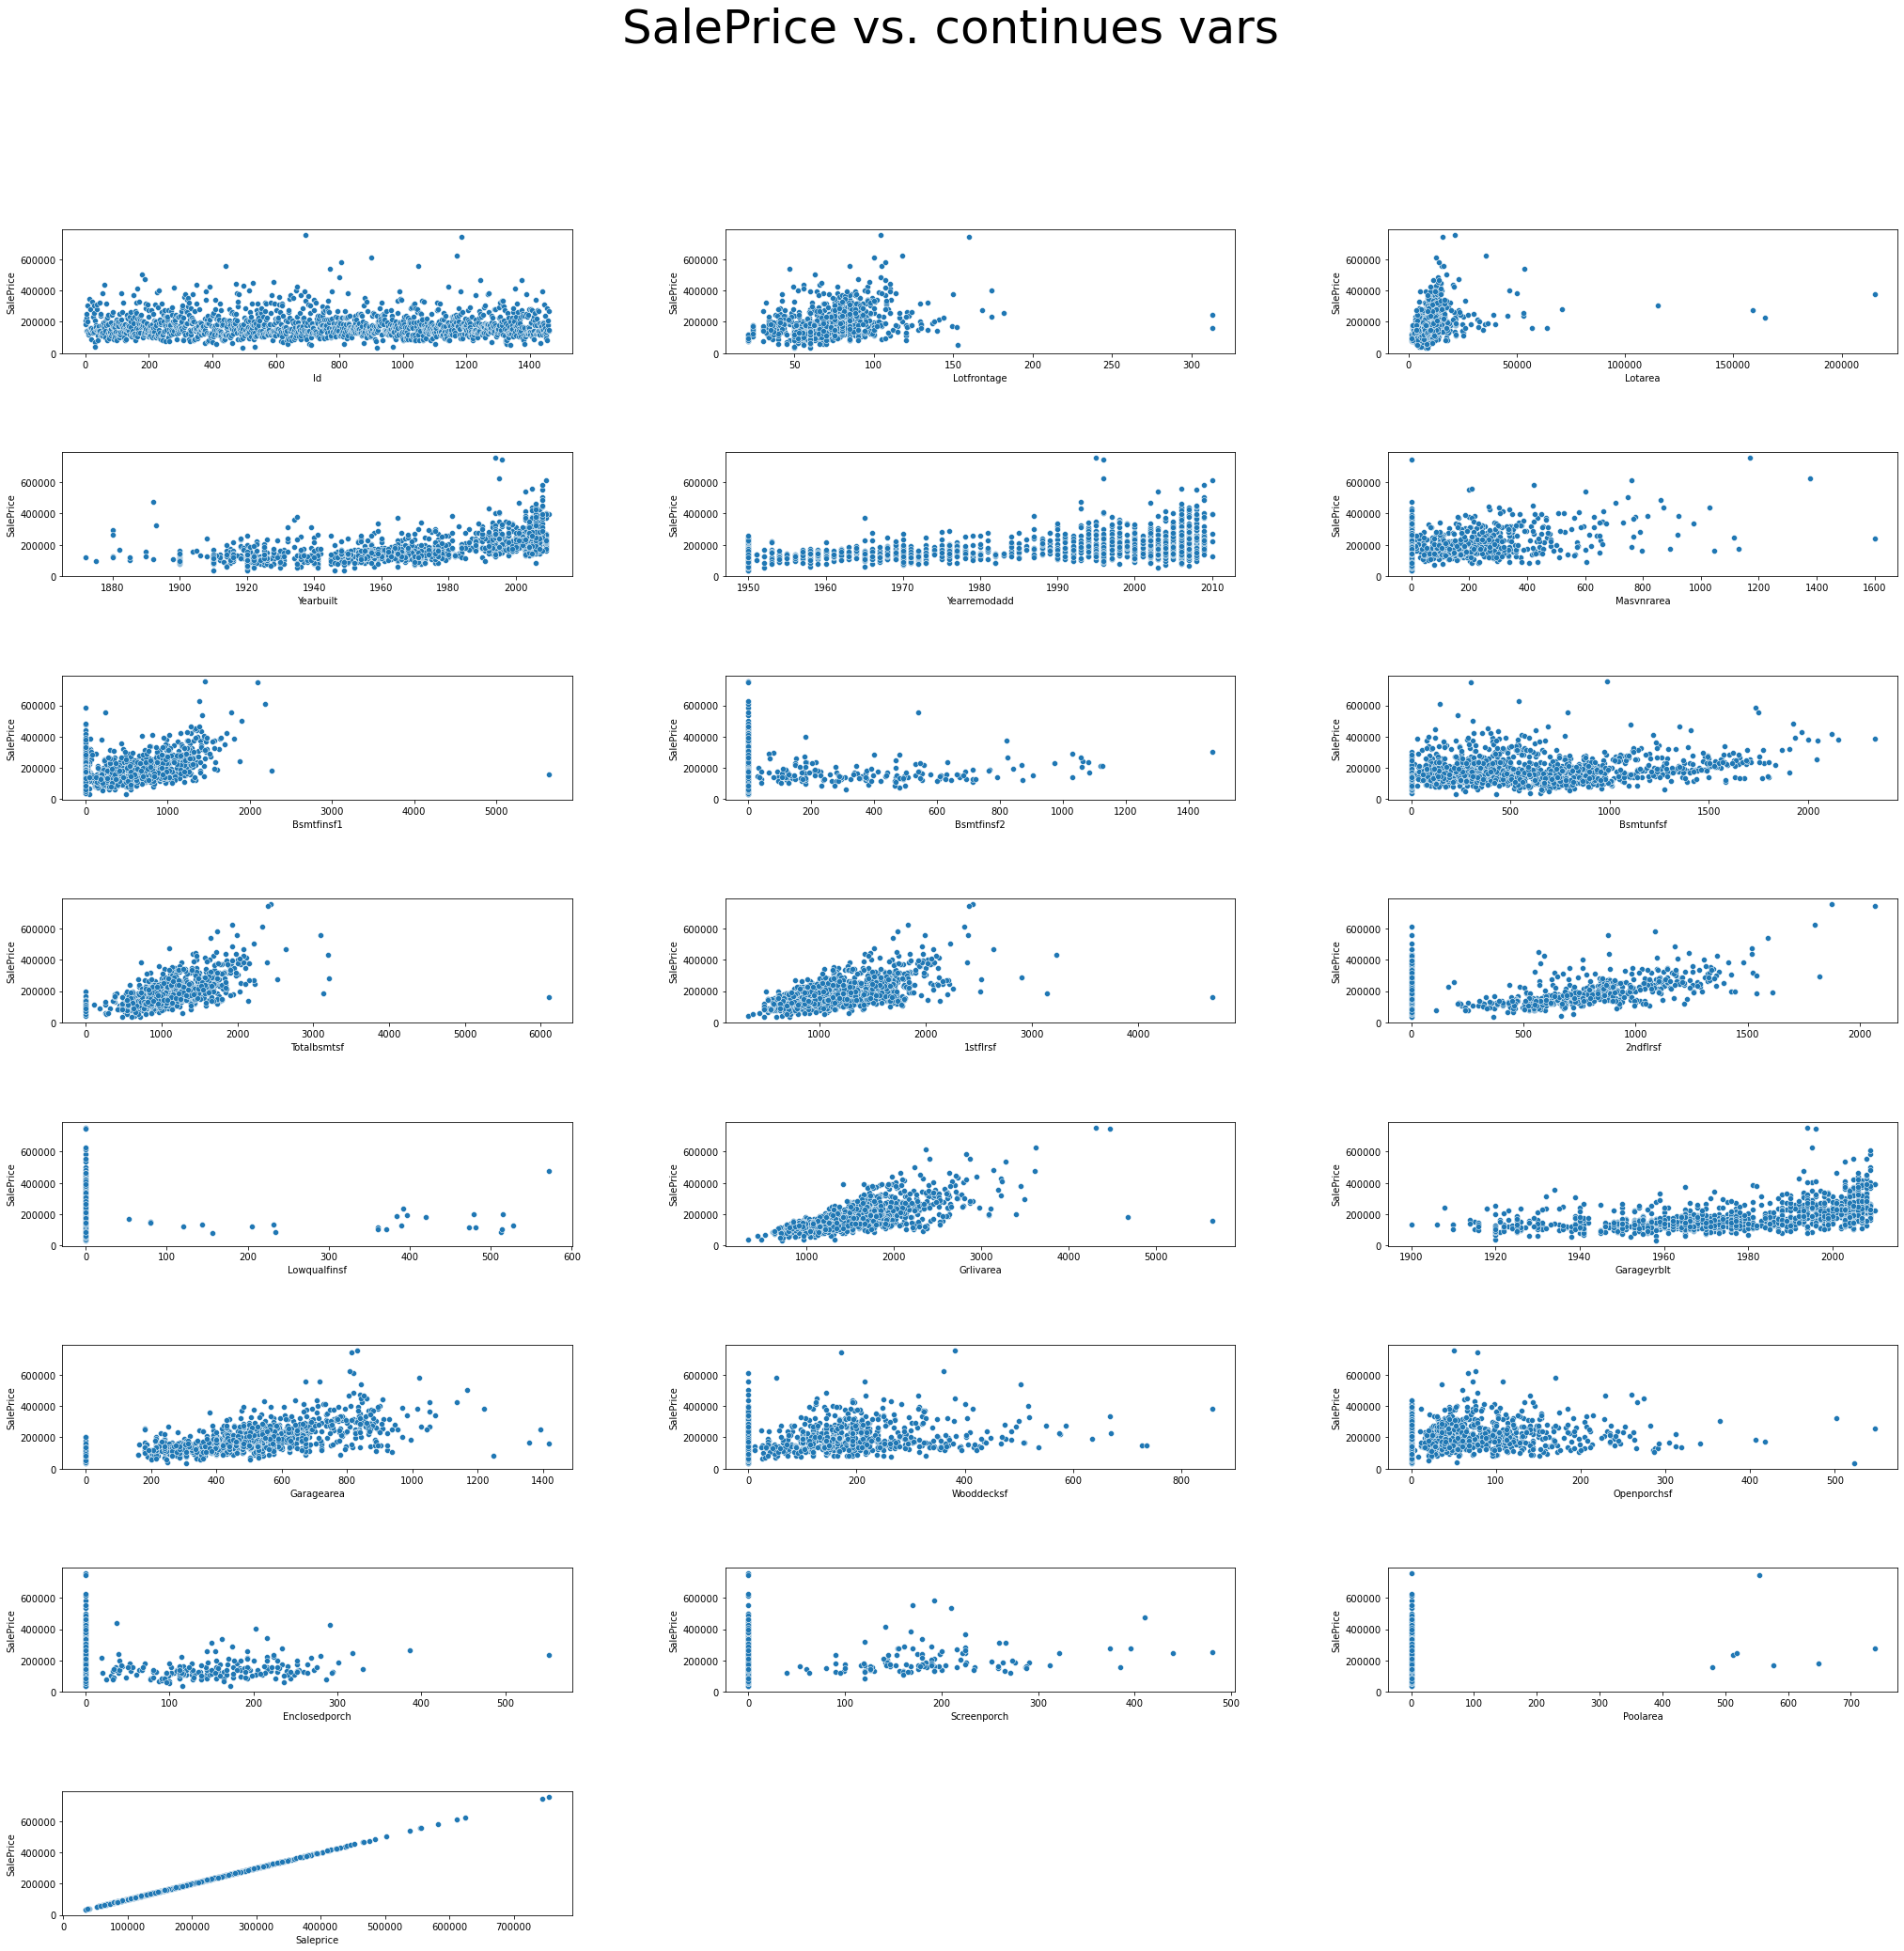

In [101]:
def plot_scatter_plot(data:pd.DataFrame, cols:list, comp_var:str, title:str):
    """
    Plot scatter plot between the comparison variable and continues variables
    
    Parameters
    ----------
    data : DataFrame
    cols : list of features
    comp_var: str
    title: str
    """
    figure = plt.figure(figsize=(35, int(len(cols)*1.5)))
    figure.subplots_adjust(wspace=0.3, hspace=0.8)

    for i, col in enumerate(cols, start=1):
        ax = figure.add_subplot(len(cols)//3 + 1, 3, i)
        sns.scatterplot(x=col, y=comp_var, data=data, ax=ax)
        ax.set_xlabel(col.capitalize())
        ax.set_ylabel(comp_var)

    figure.suptitle(title, fontsize=50)

plot_scatter_plot(data=df_train, cols=num_vars, comp_var='SalePrice', title='SalePrice vs. continues vars')

#### Correlation matrix
Based on the **univariate analysis**, spearman correlation coefficient is the best way to check the correlation between the variables because the data is not normally distributed.


From the correlation matrix, the pairs of features with high correlation are:
- YearBuilt: {GarageYrBlt: 0.891, HouseAge: -0.98},
- YearRemodAdd: {GarageYrBlt: 0.72},
- TotalBsmtSF: {1stFlrSF: 0.82},
- GrLivArea: {SalePrice: 0.73},

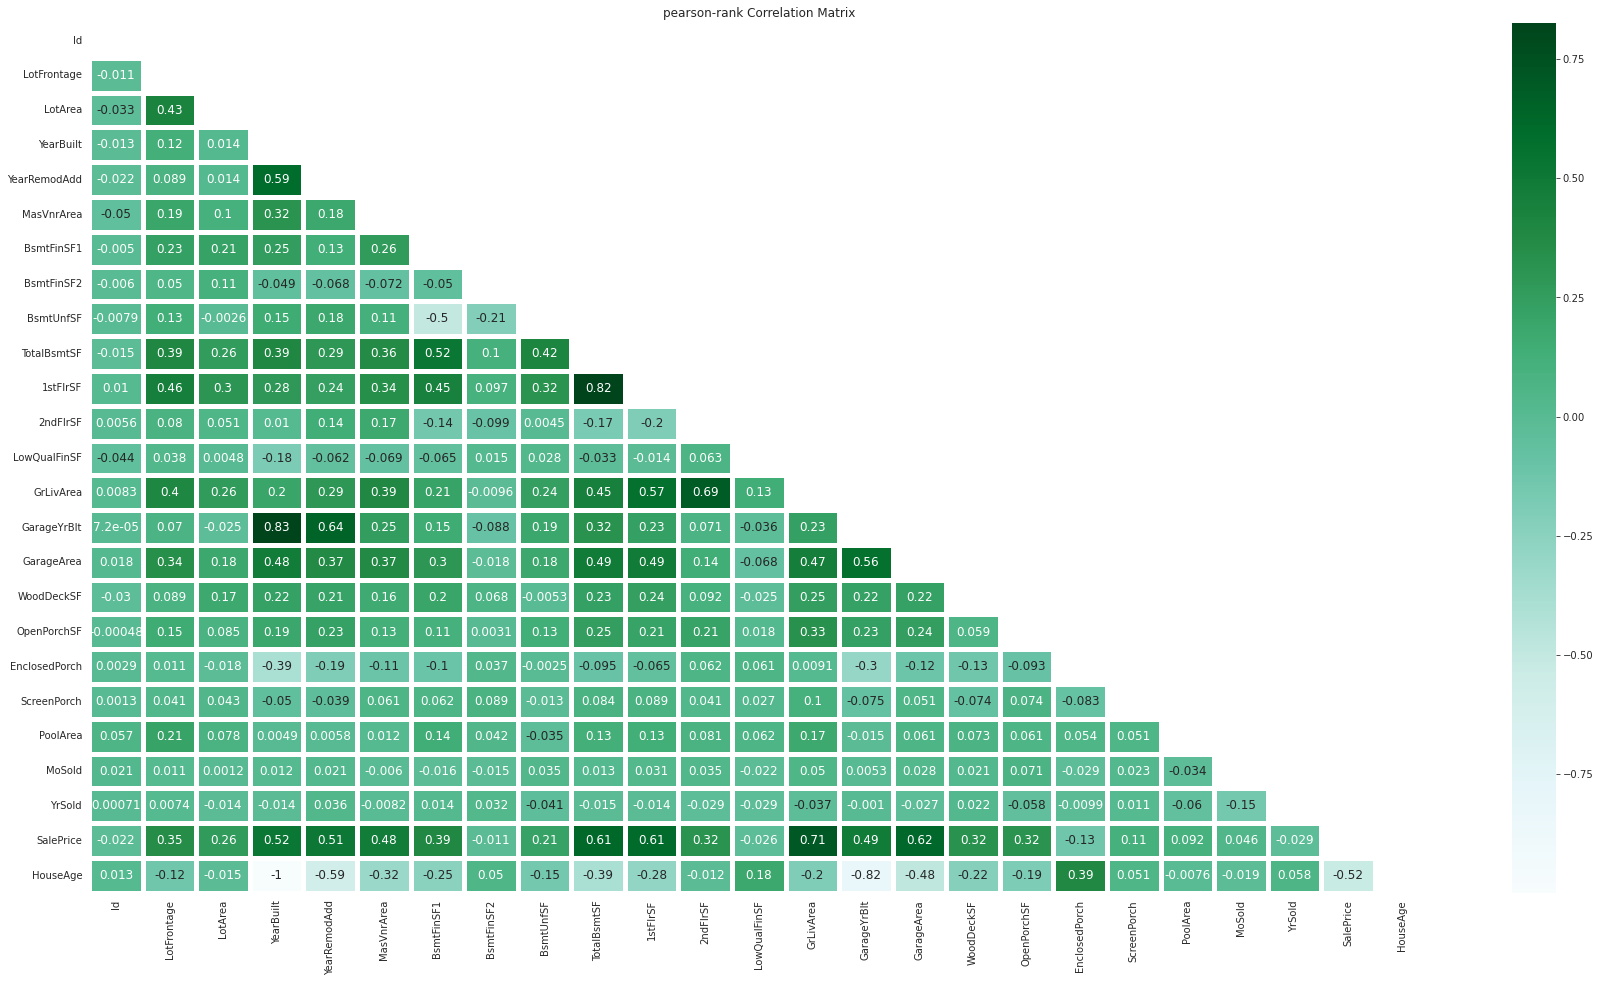

In [ ]:
# Find the spearman correlation between features

def plot_corr_mat(data:pd.DataFrame, method='spearman'):
    corr_mat = data.corr(method=method) # corr method take only numeric vars


    mask = np.zeros_like(corr_mat)
    mask[np.triu_indices_from(mask)] = True
    
    with sns.axes_style("whitegrid"): # white, dark, whitegrid, darkgrid, ticks
        f, ax = plt.subplots(figsize=(30, 16))
        ax = sns.heatmap(data=corr_mat, mask=mask, annot=True, annot_kws={'size':12}, linewidths=5, cmap=plt.cm.BuGn)
        ax.set_title(f'{method}-rank Correlation Matrix')

    return corr_mat

corr_mat = plot_corr_mat(data=df_train, method='pearson')

In [ ]:
def find_corr_feat(corr_mat:pd.DataFrame,  threshold:float) -> pd.DataFrame:
    """
    Find correlated features that have correlation value bigger than the threshold
        
        Parameters
        ----------
        data : DataFrame
        threshold : float
        
        Returns
        -------
        correlated_feat : DataFrame contains correlated features
    """

    # Create dictionary holds correlation features
    correlated_features = defaultdict(dict)

    # we search for correlated values in triangular shape
    for col_ind, col_name in enumerate(corr_mat.columns):
        for row_ind in range(col_ind):
            corr_val = round(abs(corr_mat.iloc[row_ind, col_ind]), 3)
            if(corr_val < threshold):
                continue
            correlated_features[col_name][corr_mat.index[row_ind]] = corr_val
        
    return correlated_features

print("The most correlate features are:\n ", find_corr_feat(corr_mat, 0.65))


The most correlate features are:
  defaultdict(<class 'dict'>, {'1stFlrSF': {'TotalBsmtSF': 0.82}, 'GrLivArea': {'2ndFlrSF': 0.688}, 'GarageYrBlt': {'YearBuilt': 0.826}, 'SalePrice': {'GrLivArea': 0.709}, 'HouseAge': {'YearBuilt': 0.999, 'GarageYrBlt': 0.825}})


## Target - categorical vars
*In Summary:*

The most contributed categorical features in predicting the **SalePrice** are:
- Neighborhood
- Condition2
- OverallQual
- OverallCond
- RoofMatl
- Exterior2nd
- ExtraQual
- BsmtQual
- BsmtCond
- HeatingQC
- FullBath
- KitchenQuall
- TotRmsAbvGrd
- FireplaceQu
- GarageType
- GarageCars
- PoolQC

In [ ]:
def calc_agg(data:pd.DataFrame, groupby_col:str, target_col:str, agg_val:str):

    """
    Groupe data by groupby_col and calculate the median value and calculate aggregate value for each category groupby_column
    """
    df_agg = data.groupby(groupby_col).agg(agg_val)[target_col].to_frame()

    # Make index values as groupby_column
    df_agg[groupby_col] = df_agg.index

    # Change median value groupby_column name
    df_agg.rename(columns={target_col:agg_val}, inplace=True)
    
    # Reset the index
    df_agg.reset_index(drop=True, inplace=True)

    # Change type of the category groupby_column to string
    df_agg[groupby_col] = df_agg[groupby_col].astype(str)

    # Sort dateframe by value of category groupby_column
    df_agg = df_agg.sort_values(by=agg_val)

    return df_agg


#### Bar plot \w mean

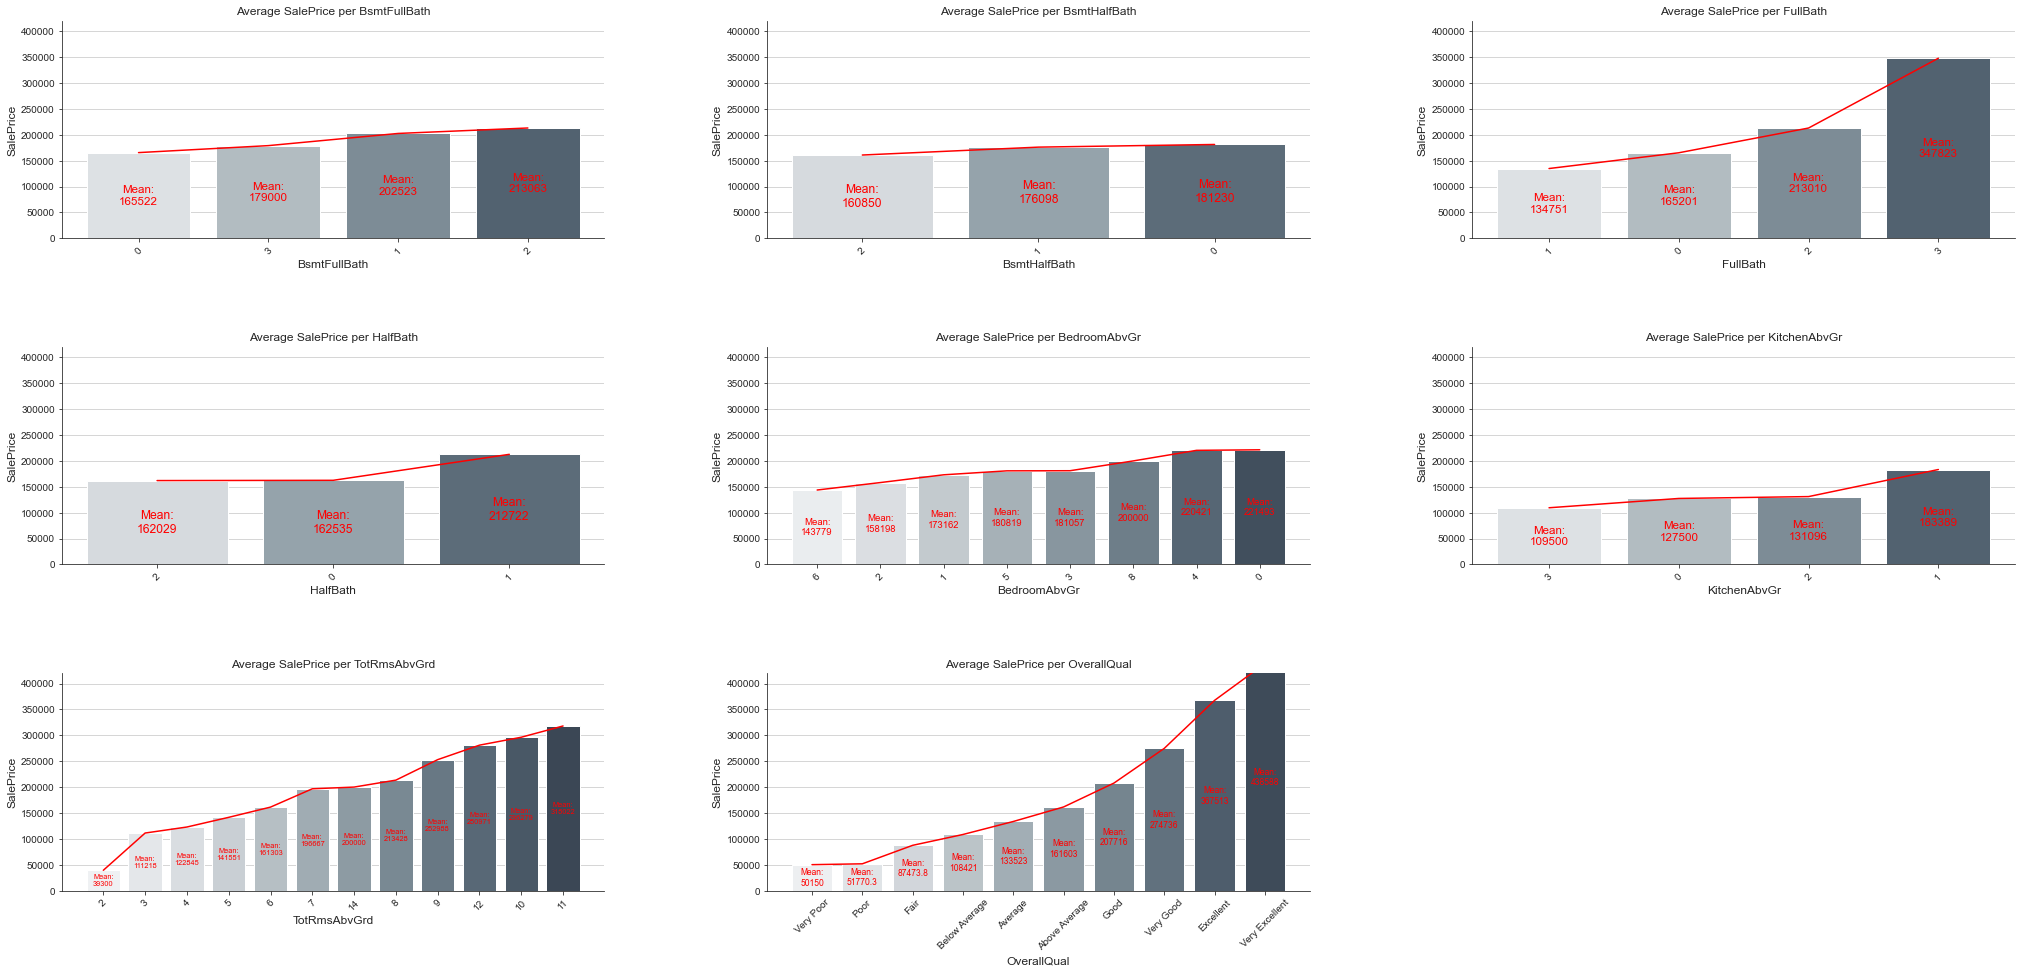

In [ ]:
def plot_mean_count_plot(data:pd.DataFrame, cols:list, comp_var:str, title:str):
    """
    Plot mean of comparison variable grouped by categorical features as scatter plot
    
    Parameters
    ----------
    data : DataFrame
    cols : list of features
    comp_var : str
    """
    # figure, axs = plt.subplots(nrows=len(cols), ncols=1, figsize=(15, len(cols)*9))

    figure = plt.figure(figsize=(35, int(len(cols)*2)))
    figure.subplots_adjust(wspace=0.3, hspace=0.5)

    # for i, col in enumerate(cols):

    # plot the bar of categorical variables
    for i, col in enumerate(cols, start=1):
        ax = figure.add_subplot(len(cols)//3 + 1, 3, i)

        df_means = calc_agg(data, col, comp_var, agg_val='mean')

        bar_axs = sns.barplot(x=col, y='mean', data=df_means, order=df_means[col], palette="Blues", saturation=0.2, ci=None, ax=ax)
        sns.lineplot(x=col, y='mean', data=df_means, color='red', ax=ax)

        # Adjust labels size to the number of x-ticks and x-lim
        lbl_font_size = -22.4*ax.get_xlim()[1] + 23*len(ax.get_xticks())

        # Label each bar by its value
        ax.bar_label(bar_axs.containers[-1], label_type='center', fmt="Mean:\n%g", fontsize=lbl_font_size, color='red')
        ax.set_title(f"Average {comp_var} per {col}")
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel(comp_var, fontsize=12)
        ax.tick_params(axis='x', rotation=45)
        ax.set_ylim([0, 420_000])
        sns.set_style("ticks", {'axes.grid' : True})

        sns.despine()

    # figure.suptitle(title, fontsize=50)


cols = categorical_feat
plot_mean_count_plot(data=df_train, cols=cols, comp_var= 'SalePrice', title='Mean price per category')

#### Box-whisker \w mean

MSSubClass SalePrice


KeyError: 'SalePrice'

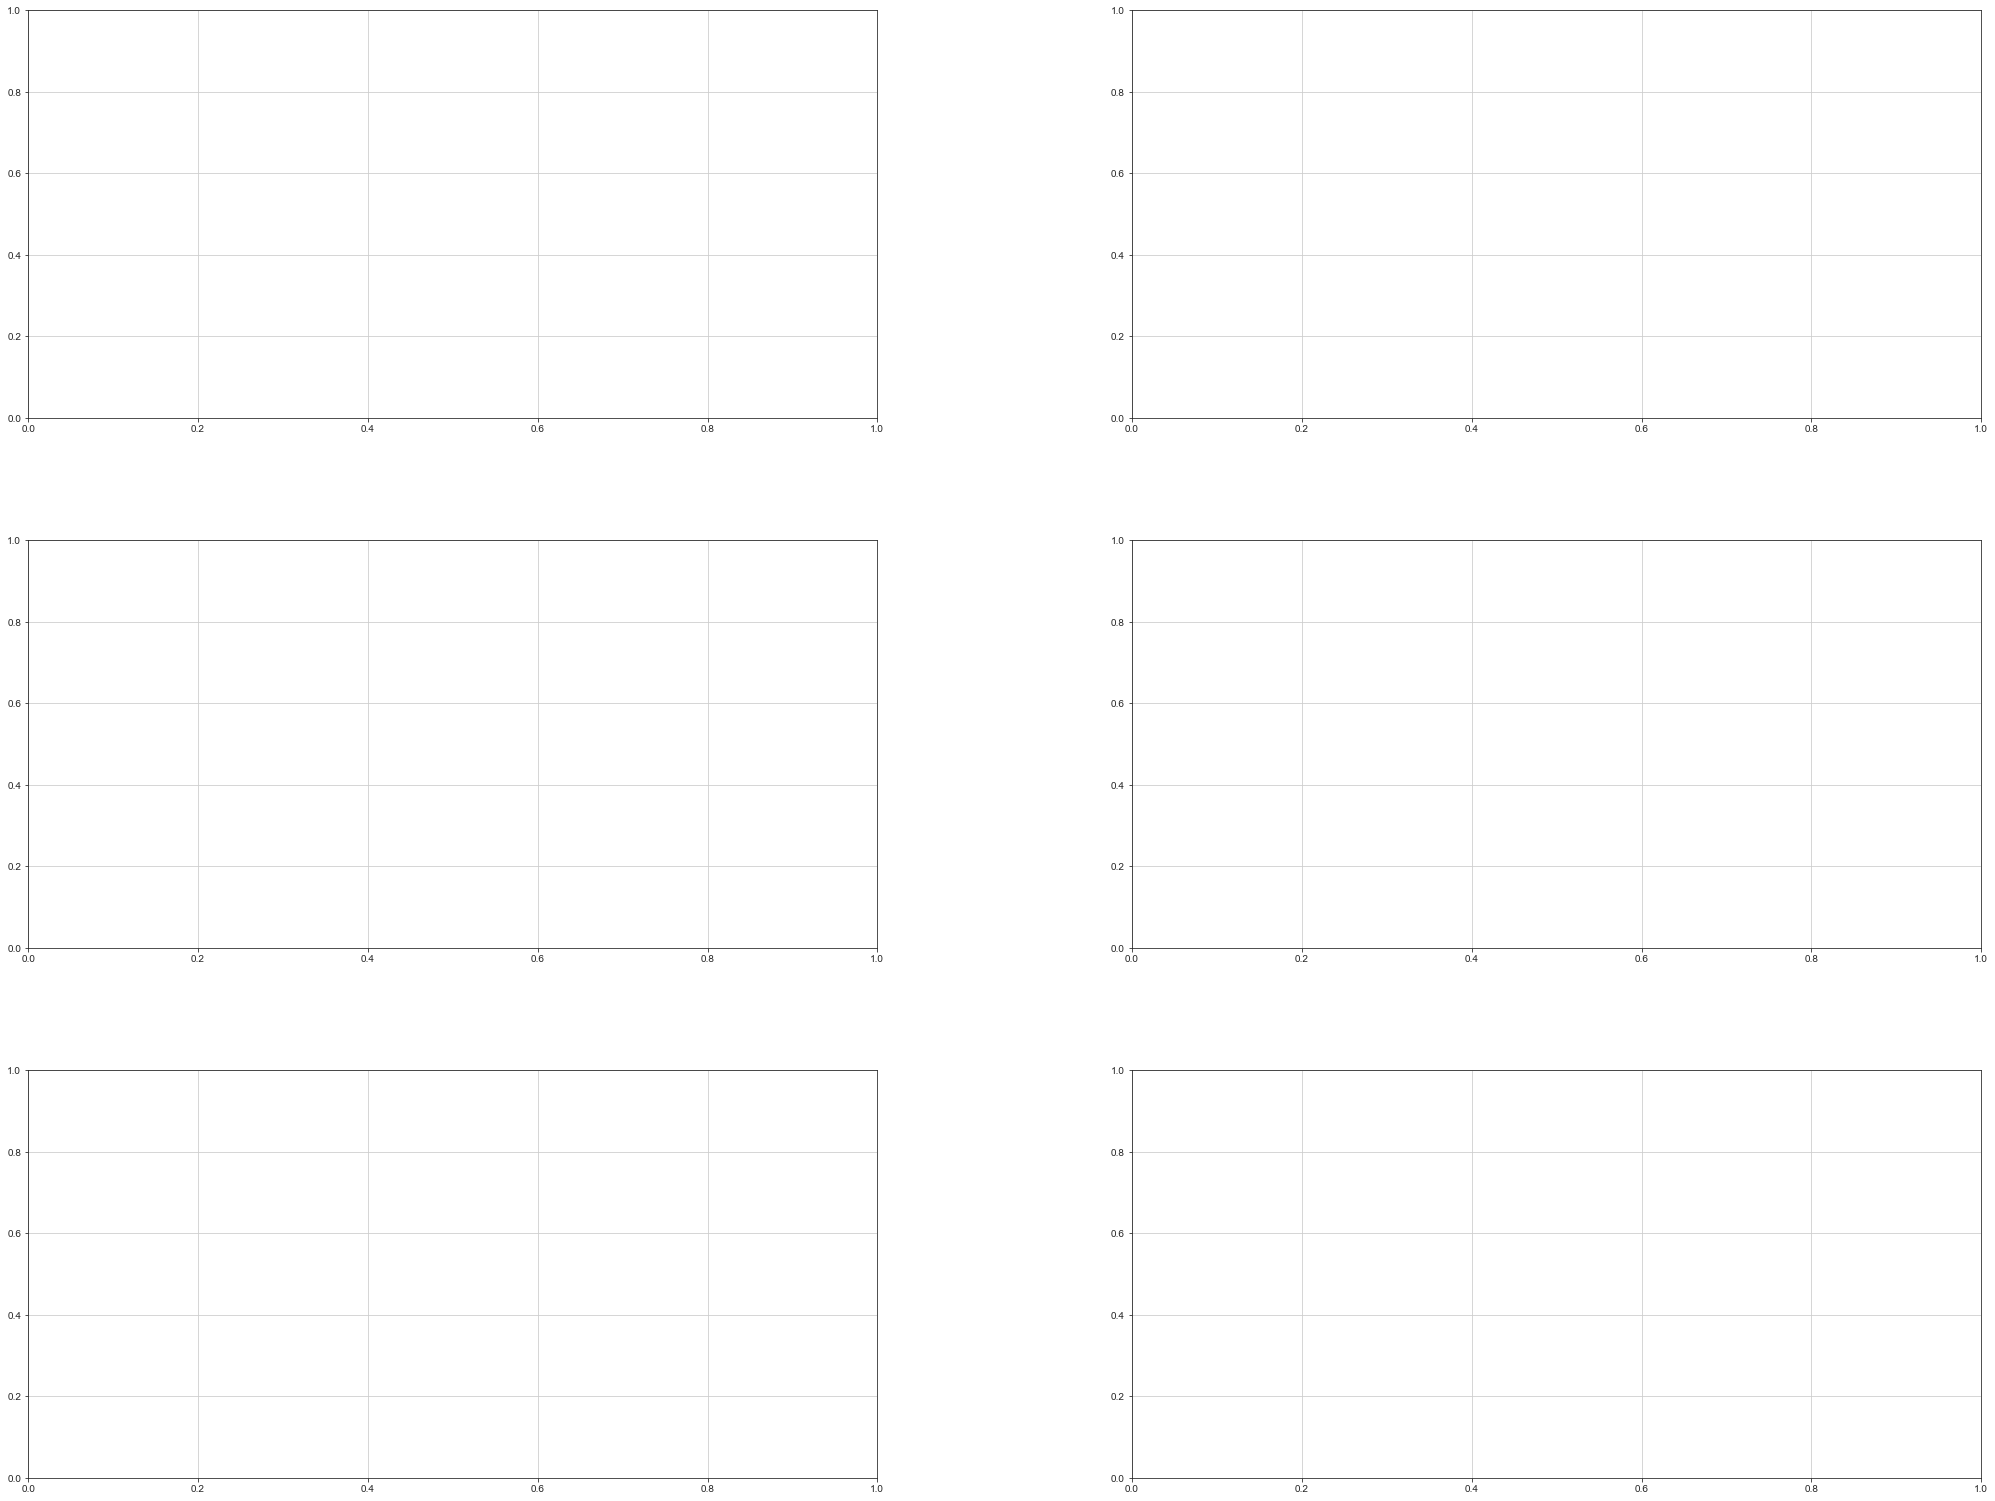

In [ ]:
def plot_mean_box_plot(data:pd.DataFrame, features:list[str], comp_var:str, title:str=None):
    """
    Plot mean of comparison variable grouped by categorical features as scatter plot
    
    Parameters
    ----------
    data : DataFrame
    features : list of features
    comp_var : str
    """

    figure, axs = plt.subplots(nrows=len(features), ncols=2, figsize=(35, len(features)*9))

    # Reshape the axs to 2 dimension array if the features list is 1 dimension.
    axs = np.reshape(axs, (-1, 2))

    figure.subplots_adjust(wspace=0.3, hspace=0.3)

    for i, col in enumerate(features):
        
        df_medians = calc_agg(data=data, groupby_col=col, target_col=comp_var, agg_val='median')

        print(df[col])
        # Draw box-whisker plot 
        box_plot = sns.boxplot(x=col, y=comp_var, data=data, order=df_medians[col], palette='viridis', ax=axs[i][0])

        # # Put text on the median line
        # for xtick in box_plot.get_xticks():
        #     box_plot.text(x=xtick, y=df_medians.loc[xtick, 'median']+0.2, s=str(df_medians.loc[xtick, 'median']), 
        #             horizontalalignment='center',size='x-small',color='w',weight='semibold')

        axs[i][0].set_title(f'{comp_var} vs. {col}')
        axs[i][0].set_ylabel(comp_var)


        # Draw points that represent median value in each category
        sns.scatterplot(x=col, y='median', data=df_medians, s=150, color='red', ax=axs[i][1])

        # Draw trend line that represent 
        sns.lineplot(x=col, y='median', data=df_medians, size=9, ax=axs[i][1])

        
        # # Put text on the median points
        # for point_x, point_y in zip(df_medians[col].to_list(), df_medians['median'].to_list()):
        #     axs[i][1].text(point_x, point_y, str(round(point_y,2)), horizontalalignment='left', size='medium', color='black', weight='semibold')

        axs[i][1].set_title(f"{comp_var}'s median per {col}")
        axs[i][1].set_xlabel(col, fontsize=12)
        axs[i][1].set_ylabel(comp_var, fontsize=12)
        axs[i][1].set_xticklabels(df_medians[col])
        axs[i][1].set_ylim(axs[i][0].get_ylim())
        
        sns.despine()

    # figure.suptitle(title, fontsize=50)

plot_mean_box_plot(data=df_train, features=categorical_feat[:3], comp_var= 'SalePrice', title='Mean price per category')

# Multivariate

In [ ]:
# sns.pairplot(data=df_train[numerical_feat], corner=True, palette='RdYlGn')

# Missing values checking
- There is a big percent of missing values in **PoolQC** & **MiscFeature** & **Alley** & **Fence**, as a result, we will remove them later.

,Values,Percentage,Type
PoolQC,1453,99.521,object
MiscFeature,1406,96.301,object
Alley,1369,93.767,object
FenceQual,1179,80.753,object
FireplaceQu,690,47.260,object
LotFrontage,259,17.740,float64
GarageYrBlt,81,5.548,float64
GarageCond,81,5.548,object
GarageType,81,5.548,object
GarageFinish,81,5.548,object


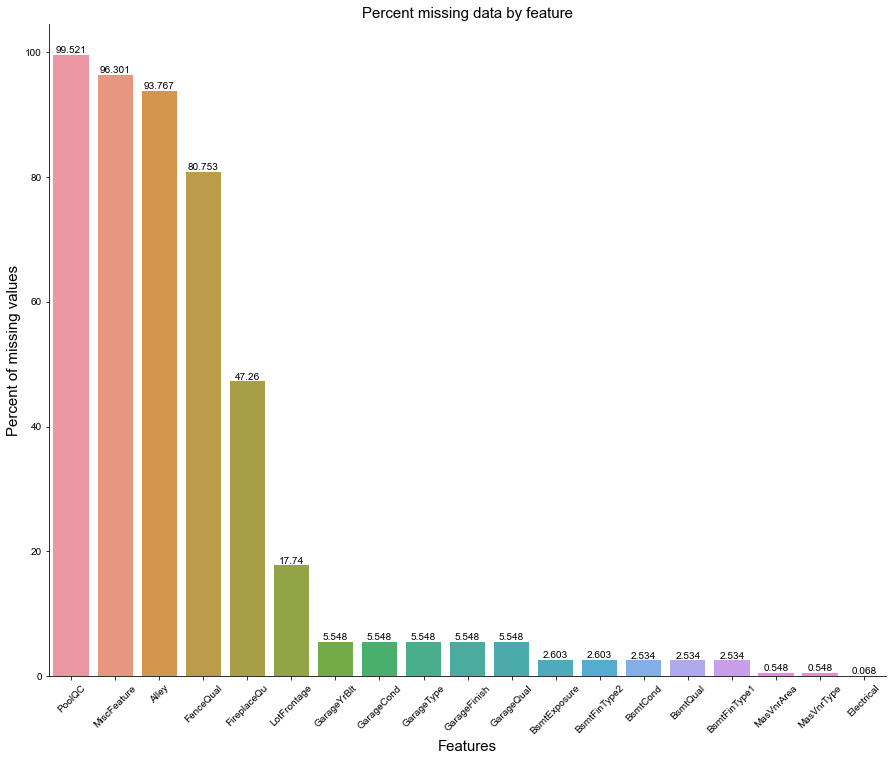

In [ ]:
def check_missing_vals(data:pd.DataFrame, with_plot=True):
    """
    Check the presence of Null values in each feature
    
    Parameters
    ----------
    data : DataFrame
    """

    missings = pd.DataFrame()

    missing_vals = data.isnull().sum().sort_values(ascending=False)
    
        
    missing_vals = missing_vals[missing_vals!=0]

    missings.index = missing_vals.index
    missings['Values'] = missing_vals.values
    missings['Percentage'] = round(missings['Values'] / len(data) *100, 3)
    missings['Type'] = data[missings.index].dtypes
    
    if(missing_vals.empty):
        return

    if(with_plot):
        # Plot heatmap of columns that include missing values
        f, ax = plt.subplots(figsize=(15, 12))
        # ax = sns.heatmap(data.isnull()[missings.index], yticklabels=False, cbar=False, cmap='viridis')
        bar_axs = sns.barplot(x=missings.index, y=missings['Percentage'], ax=ax)
        ax.bar_label(bar_axs.containers[-1])
        ax.tick_params('x', rotation=45)
        ax.set_xlabel('Features', fontsize=15)
        ax.set_ylabel('Percent of missing values', fontsize=15)
        ax.set_title('Percent missing data by feature', fontsize=15)
        sns.despine()
        sns.set_style("ticks", {'axes.grid' : True})

    return missings
    
check_missing_vals(df_train)


# Duplicates values checking

In [ ]:
def check_duplicates(data:pd.DataFrame) -> list[pd.Index]:
    """Check the presence of duplicates value"""
    dup_indexes = data[data.duplicated()].index
    return dup_indexes

check_duplicates(df_train)

Int64Index([], dtype='int64')

# Outliers checking

### Using Box-whisker plot
*Outliers:*
- LotFrontage > 300
- LotArea > 100,000
- BsmtFinSF1 > 5,000
- BsmtFinSF2 > 1,400
- TotalBsmtSF > 6,000
- 1stFlrSF > 4,000
- GrLivArea > 4,000
- GarageArea > 1,300
- WoodDeckSF > 800
- EnclosedPorch > 500
- SalePrice > 700,000

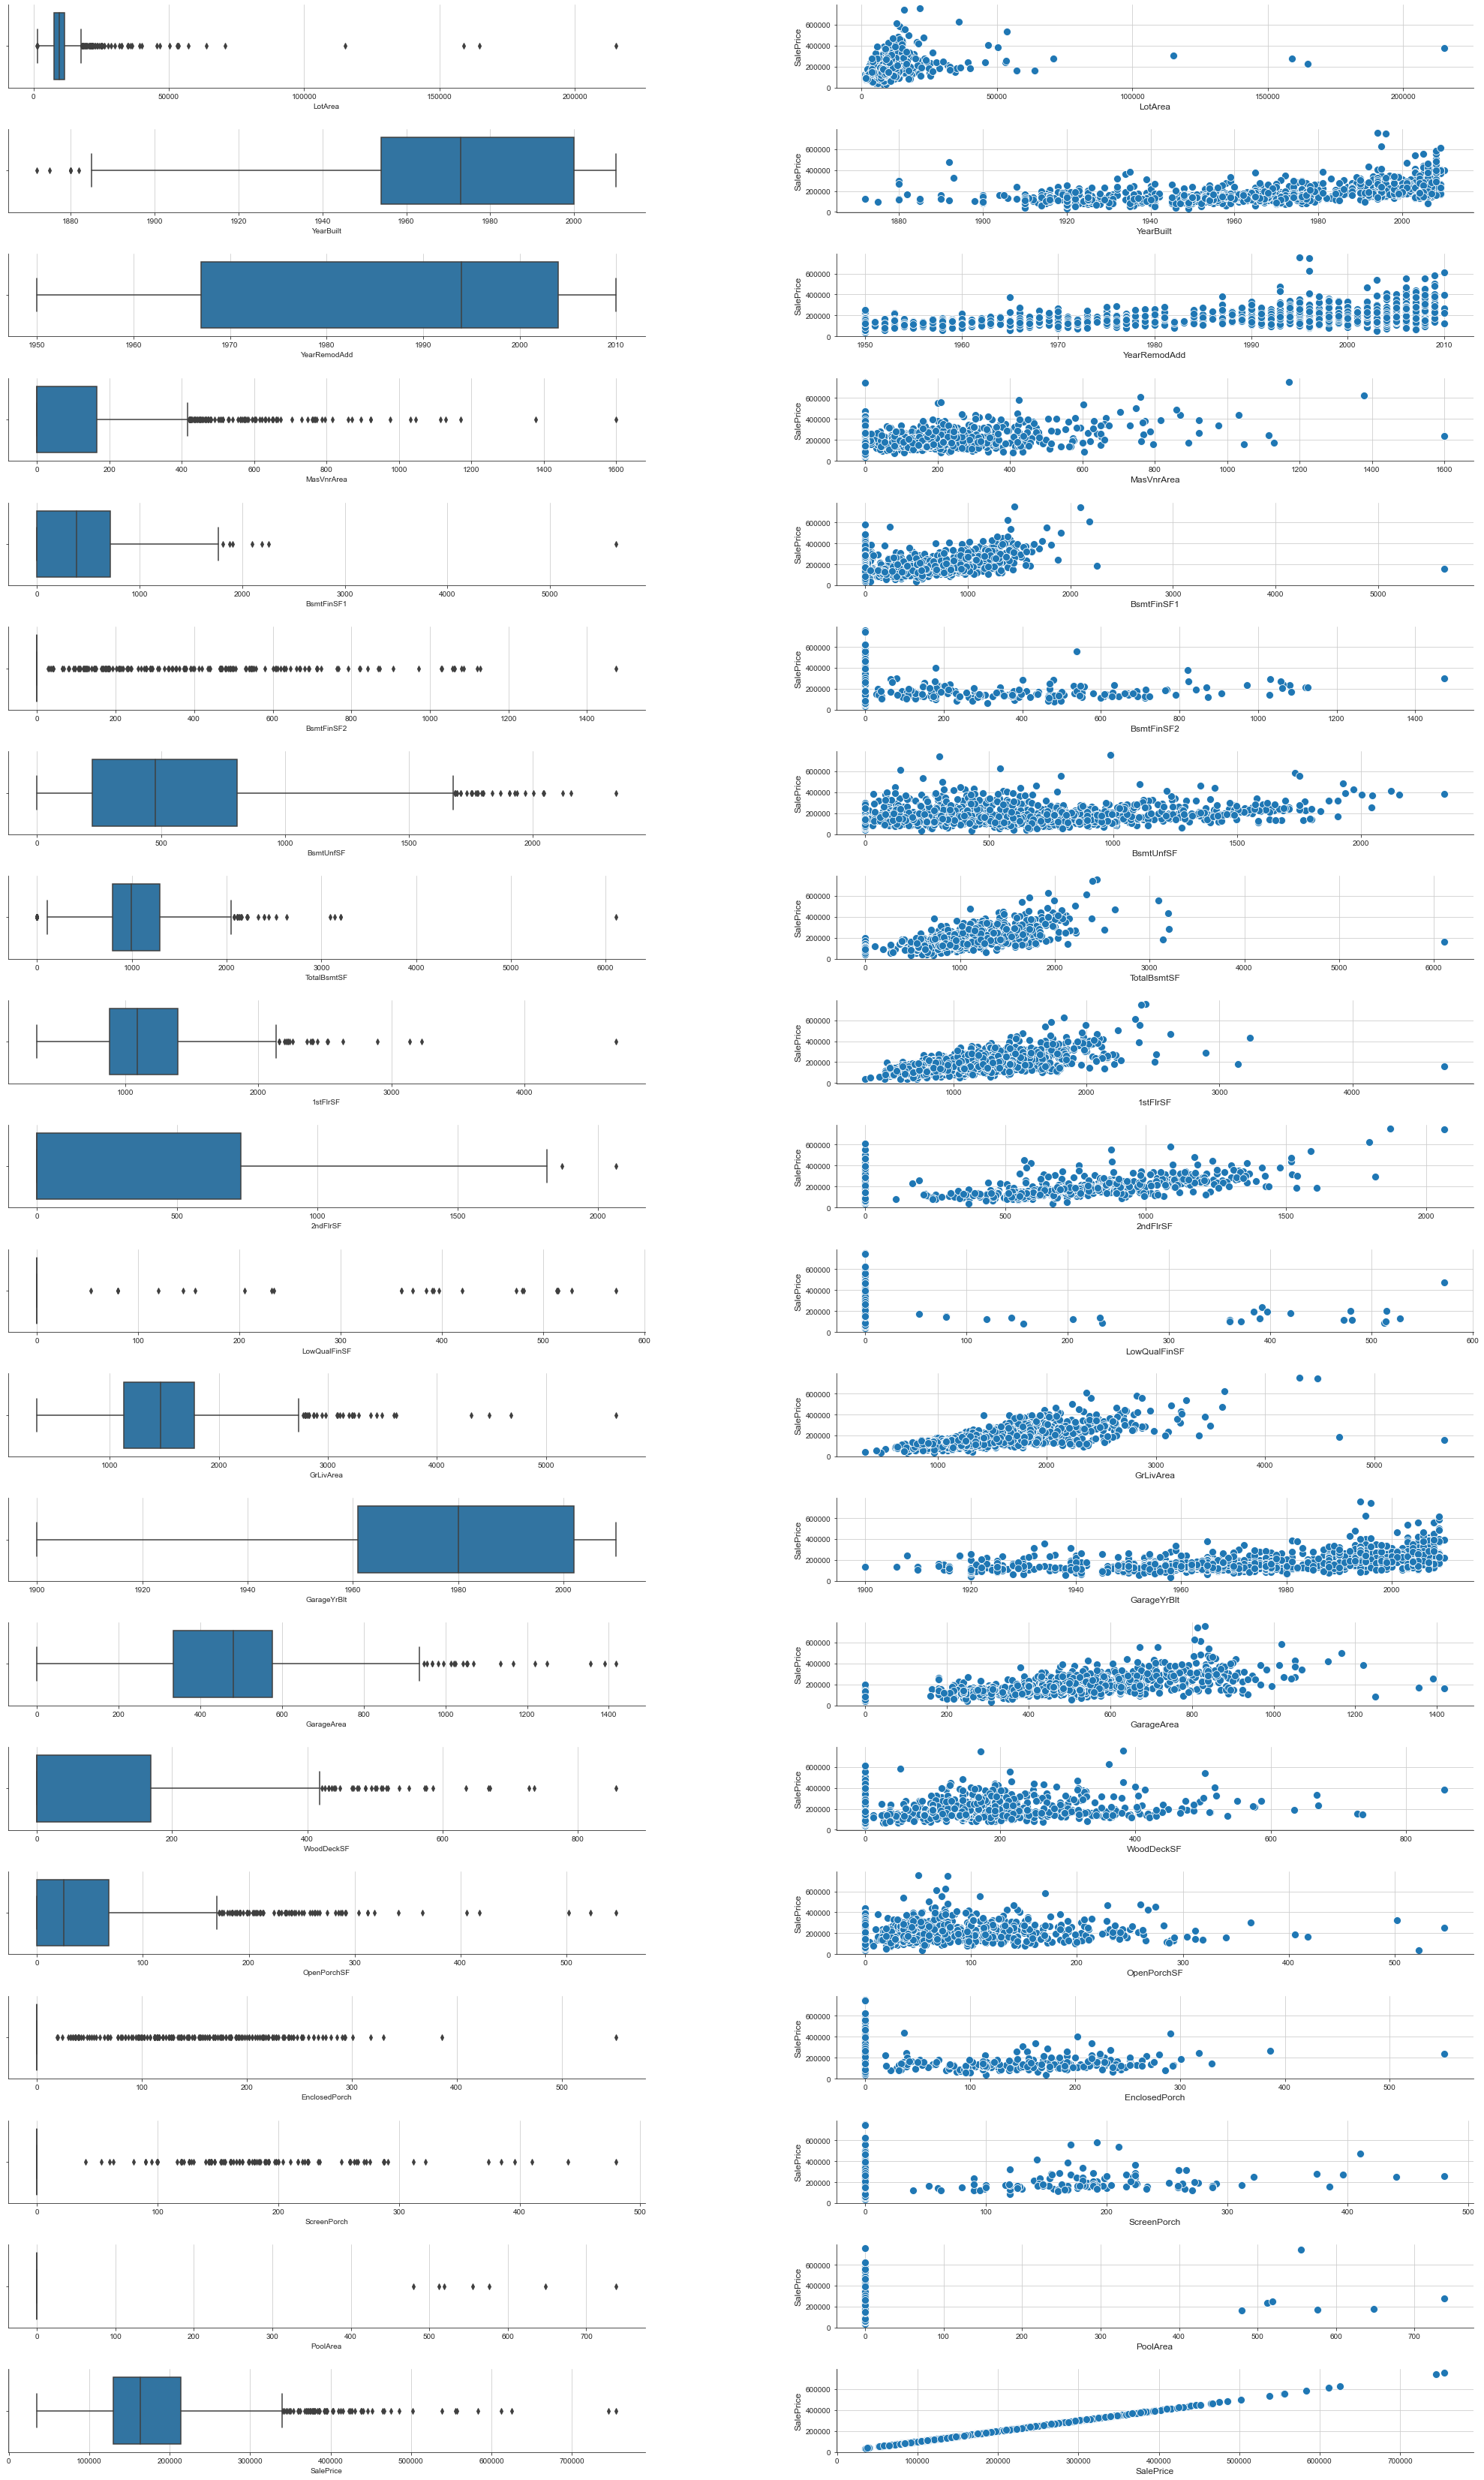

In [ ]:
def plot_box_whisker_scatter(data:pd.DataFrame, comp_var:str):
    """
    Plot box-whisker and scatter plot for numerical features
    
    Parameters
    ----------
    data : DataFrame
    comp_var: str
    """
  
    figure, axs = plt.subplots(nrows=len(data.columns), ncols=2, figsize=(35, int(len(data.columns)*3)))
    figure.subplots_adjust(wspace=0.3, hspace=0.5)

    for i, col in enumerate(data.columns):
        sns.boxplot(x=col, data=data, ax=axs[i][0])

        sns.scatterplot(x=col, y=comp_var, data=data, ax=axs[i][1], s=100)
        
        axs[i][1].set_xlabel(col, fontsize=12)
        axs[i][1].set_ylabel(comp_var, fontsize=12)
        sns.despine()
        
plot_box_whisker_scatter(data=df_train[numerical_feat], comp_var='SalePrice')



### Using percentile

In [ ]:
def detect_outliers_percentile(series:pd.Series):
    quartile_10, quartile_90 = series.quantile([0.1, 0.9])
 
    dropped_index = series[(series < quartile_10) | (series > quartile_90)].index
    return dropped_index

# outliers_perc = detect_outliers_percentile(df_train['SalePrice'])

### Manual detecting